In [12]:
import pandas as pd
import numpy as np

xls = pd.ExcelFile('cleandataset.xlsx')

df1 = pd.read_excel(xls, 'nonxtb')
df2 = pd.read_excel(xls, 'xtb')

print(df1.columns)
print(df2.columns)

Index(['Name', 'Gexp', 'DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', 'FE3',
       'mTDS', 'numbtors', 'HIEmligand', 'HIEligandE', 'logP'],
      dtype='object')
Index(['Name', 'Gexp', 'DG', 'LE', 'HIEmligand', 'logP'], dtype='object')


In [13]:
from sklearn import linear_model
from sklearn import metrics
from matplotlib import pyplot

def magnify():
    
    return [dict(selector="th",
                 props=[("font-size", "12pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '400px'),
                        ('font-size', '12pt')])]


def get_lr_model (featlist, label, df):

     x = df[featlist].values
     y = df[label].values

     #print(x.shape)
     #print(y.shape)
 
     # with sklearn
     regr = linear_model.LinearRegression()
     regr.fit(x, y)

     y_pred = regr.predict(x)

     """
     y_pred = []
     for idx, xval in enumerate(x):
          ypred = regr.intercept_
          for i, xi in enumerate(xval):
               ypred += xi*regr.coef_[i]
          y_pred.append(ypred)
     """

     mse = metrics.mean_squared_error (y, y_pred)
     r2 = metrics.r2_score (y, y_pred)

     return y, y_pred, regr, mse, r2

def print_and_plot(y, y_pred, regr, mse, r2):
     
     print('Intercept: \n', regr.intercept_)
     for idx, f in enumerate(featlist):
           print("Coeff %10s %10.4f "%(f,regr.coef_ [idx]))

     print("MSE: %10.5f R2: %10.5f"%(mse, r2))

     pyplot.scatter(y, y_pred)
     pyplot.xlabel("True Values")
     pyplot.ylabel("Predicted Values")
     pyplot.show()

In [14]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df1.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_caption("Correlation")\
    .set_precision(2)\
    .set_table_styles(magnify())

/tmp/ipykernel_2176415/2139762715.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,Gexp,DEmFMO2,F2LE,PIEmFMO2,FE2,PIEmFMO3,FE3,mTDS,numbtors,HIEmligand,HIEligandE,logP
Gexp,1.00,-0.40,-0.51,0.34,-0.50,0.37,-0.49,-0.19,-0.11,0.41,-0.14,0.21
DEmFMO2,-0.40,1.00,0.98,0.70,0.86,0.69,0.86,0.04,0.44,0.14,0.67,0.18
F2LE,-0.51,0.98,1.00,0.58,0.93,0.56,0.93,0.02,0.50,0.08,0.73,0.08
PIEmFMO2,0.34,0.70,0.58,1.00,0.41,1.00,0.42,-0.03,0.19,0.45,0.40,0.49
FE2,-0.50,0.86,0.93,0.41,1.00,0.40,1.00,-0.00,0.63,0.18,0.85,-0.06
PIEmFMO3,0.37,0.69,0.56,1.00,0.40,1.00,0.41,-0.01,0.24,0.43,0.41,0.50
FE3,-0.49,0.86,0.93,0.42,1.00,0.41,1.00,0.02,0.66,0.17,0.87,-0.05
mTDS,-0.19,0.04,0.02,-0.03,-0.00,-0.01,0.02,1.00,0.10,0.07,-0.14,0.33
numbtors,-0.11,0.44,0.50,0.19,0.63,0.24,0.66,0.10,1.00,0.13,0.84,-0.10
HIEmligand,0.41,0.14,0.08,0.45,0.18,0.43,0.17,0.07,0.13,1.00,0.34,-0.03


Intercept: 
 -24.456668799816754
Coeff    DEmFMO2    -0.0188 
Coeff       F2LE    -0.1924 
Coeff   PIEmFMO2     0.0250 
Coeff        FE2    -1.4908 
Coeff   PIEmFMO3    -0.0082 
Coeff        FE3    -1.0838 
Coeff       mTDS     0.0391 
Coeff   numbtors    -0.3481 
Coeff HIEmligand    -0.0129 
Coeff HIEligandE     0.4748 
Coeff       logP     1.2561 
MSE:    0.00000 R2:    1.00000


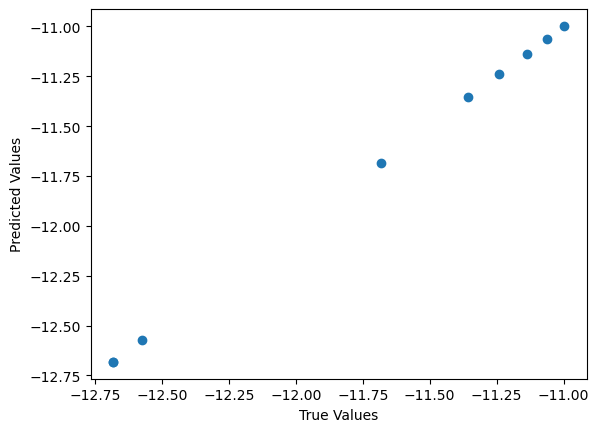

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

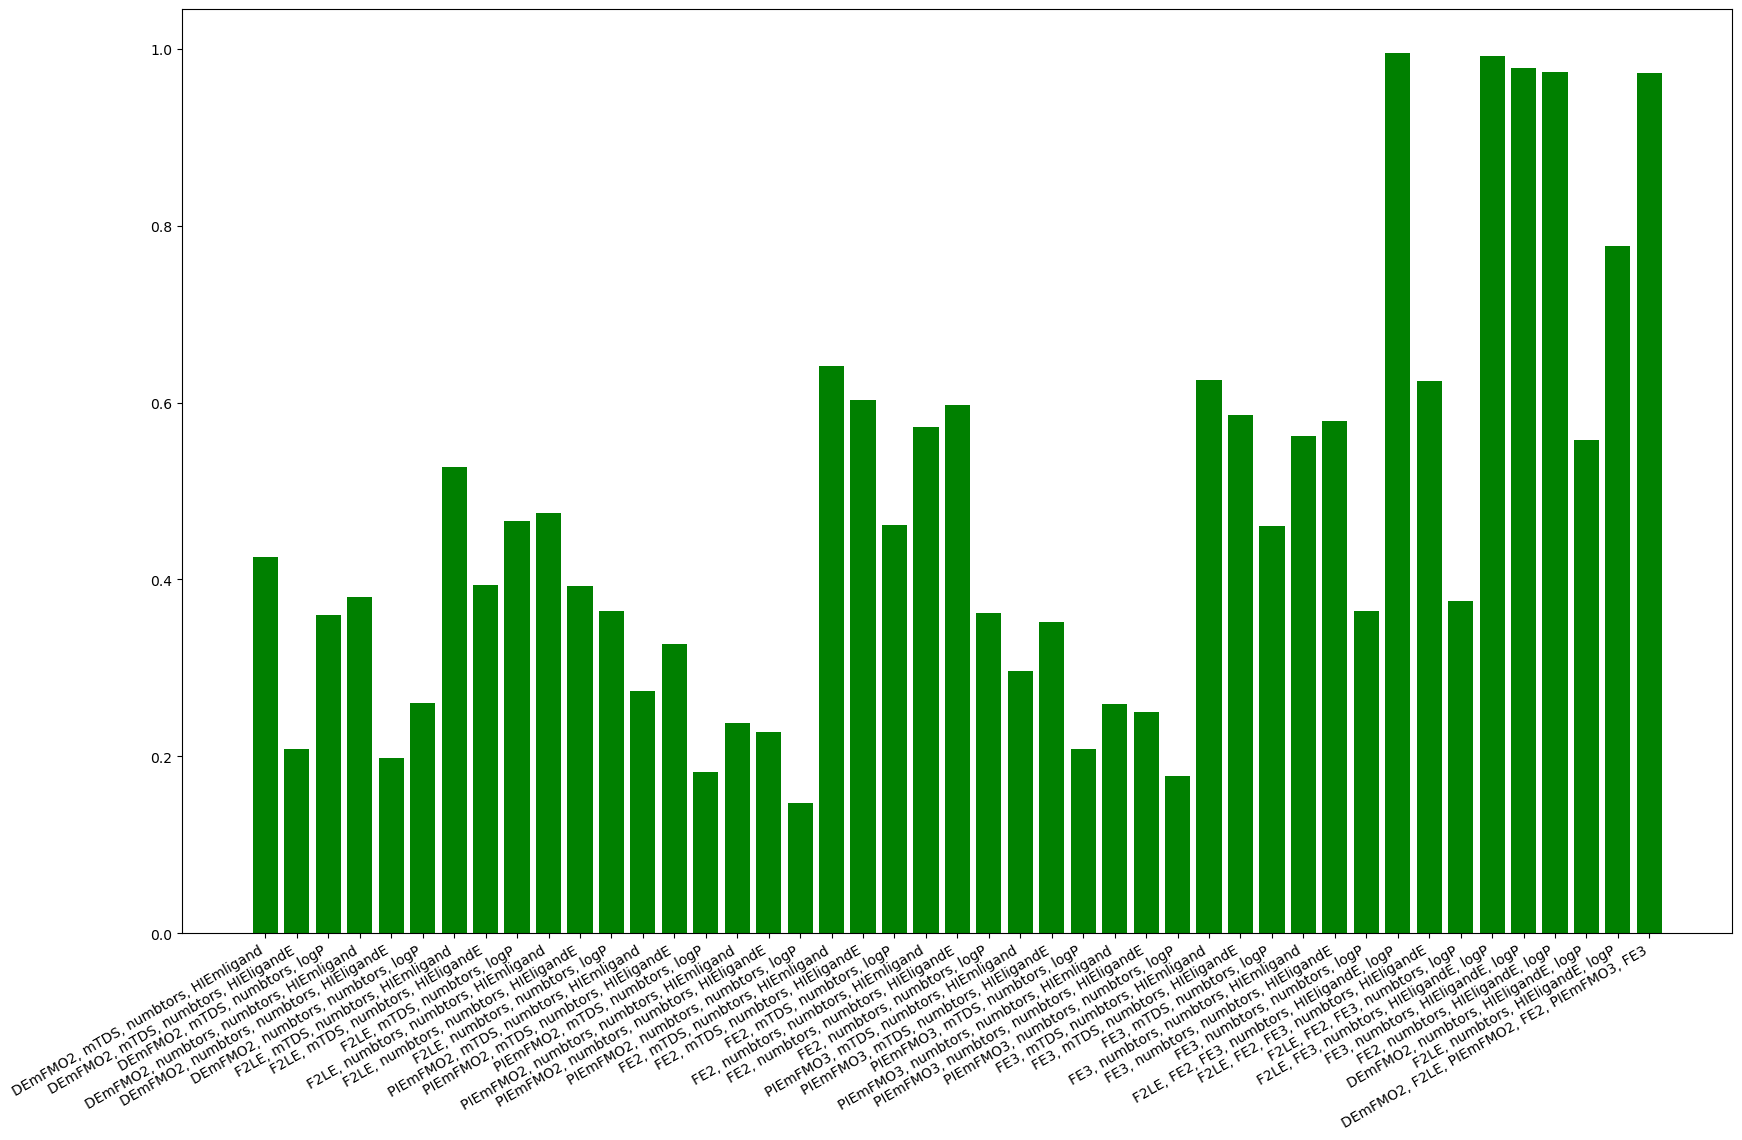

In [15]:

featlist = ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', \
       'FE3', 'mTDS', 'numbtors', 'HIEmligand', 'HIEligandE', 'logP']
label = 'Gexp'
y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
print_and_plot(y, ypred, regr, mse, r2)

msedict = {}
r2dict = {}

set1 = ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', \
       'FE3']
set2 = ['mTDS', 'numbtors']
set3 = ['numbtors']
set4 = ['HIEmligand', 'HIEligandE', 'logP']

for f1 in set1:
    for f2 in set2:
        for f3 in set3:
            for f4 in set4:
              featlist = [f1, f2, f3, f4]
              y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
              xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
              msedict[xlabel] = mse
              r2dict[xlabel] = r2
              #print("%60s %10.5f %10.5f"%(xlabel, mse, r2))

fullfeatlis = [['F2LE', 'FE2', 'FE3', 'numbtors', 'HIEligandE', 'logP'], \
               ['F2LE', 'FE2', 'FE3', 'numbtors', 'HIEligandE'], \
               ['F2LE', 'FE2', 'FE3', 'numbtors', 'logP'], \
               ['F2LE', 'FE3', 'numbtors', 'HIEligandE', 'logP'], \
               ['FE3', 'numbtors', 'HIEligandE', 'logP'], \
               ['FE2', 'numbtors', 'HIEligandE', 'logP'], \
               ['DEmFMO2', 'numbtors', 'HIEligandE', 'logP'], \
               ['F2LE', 'numbtors', 'HIEligandE', 'logP'], \
               ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', 'FE3']]

for featlist in fullfeatlis:
    y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
    xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
    msedict[xlabel] = mse
    r2dict[xlabel] = r2

fig, ax = pyplot.subplots(figsize=(20,12))
ax.bar(r2dict.keys(), r2dict.values(), color='g')
pyplot.xticks(rotation=30, ha='right')

                                   DEmFMO2, mTDS, HIEmligand    0.27196    0.42252
                                   DEmFMO2, mTDS, HIEligandE    0.37407    0.20571
                                         DEmFMO2, mTDS, logP    0.31742    0.32600
                               DEmFMO2, numbtors, HIEmligand    0.29210    0.37978
                               DEmFMO2, numbtors, HIEligandE    0.37789    0.19759
                                     DEmFMO2, numbtors, logP    0.34829    0.26045
                                      F2LE, mTDS, HIEmligand    0.23198    0.50743
                                      F2LE, mTDS, HIEligandE    0.29278    0.37832
                                            F2LE, mTDS, logP    0.28304    0.39901
                                  F2LE, numbtors, HIEmligand    0.24718    0.47515
                                  F2LE, numbtors, HIEligandE    0.28608    0.39256
                                        F2LE, numbtors, logP    0.29958    0.36388
    

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

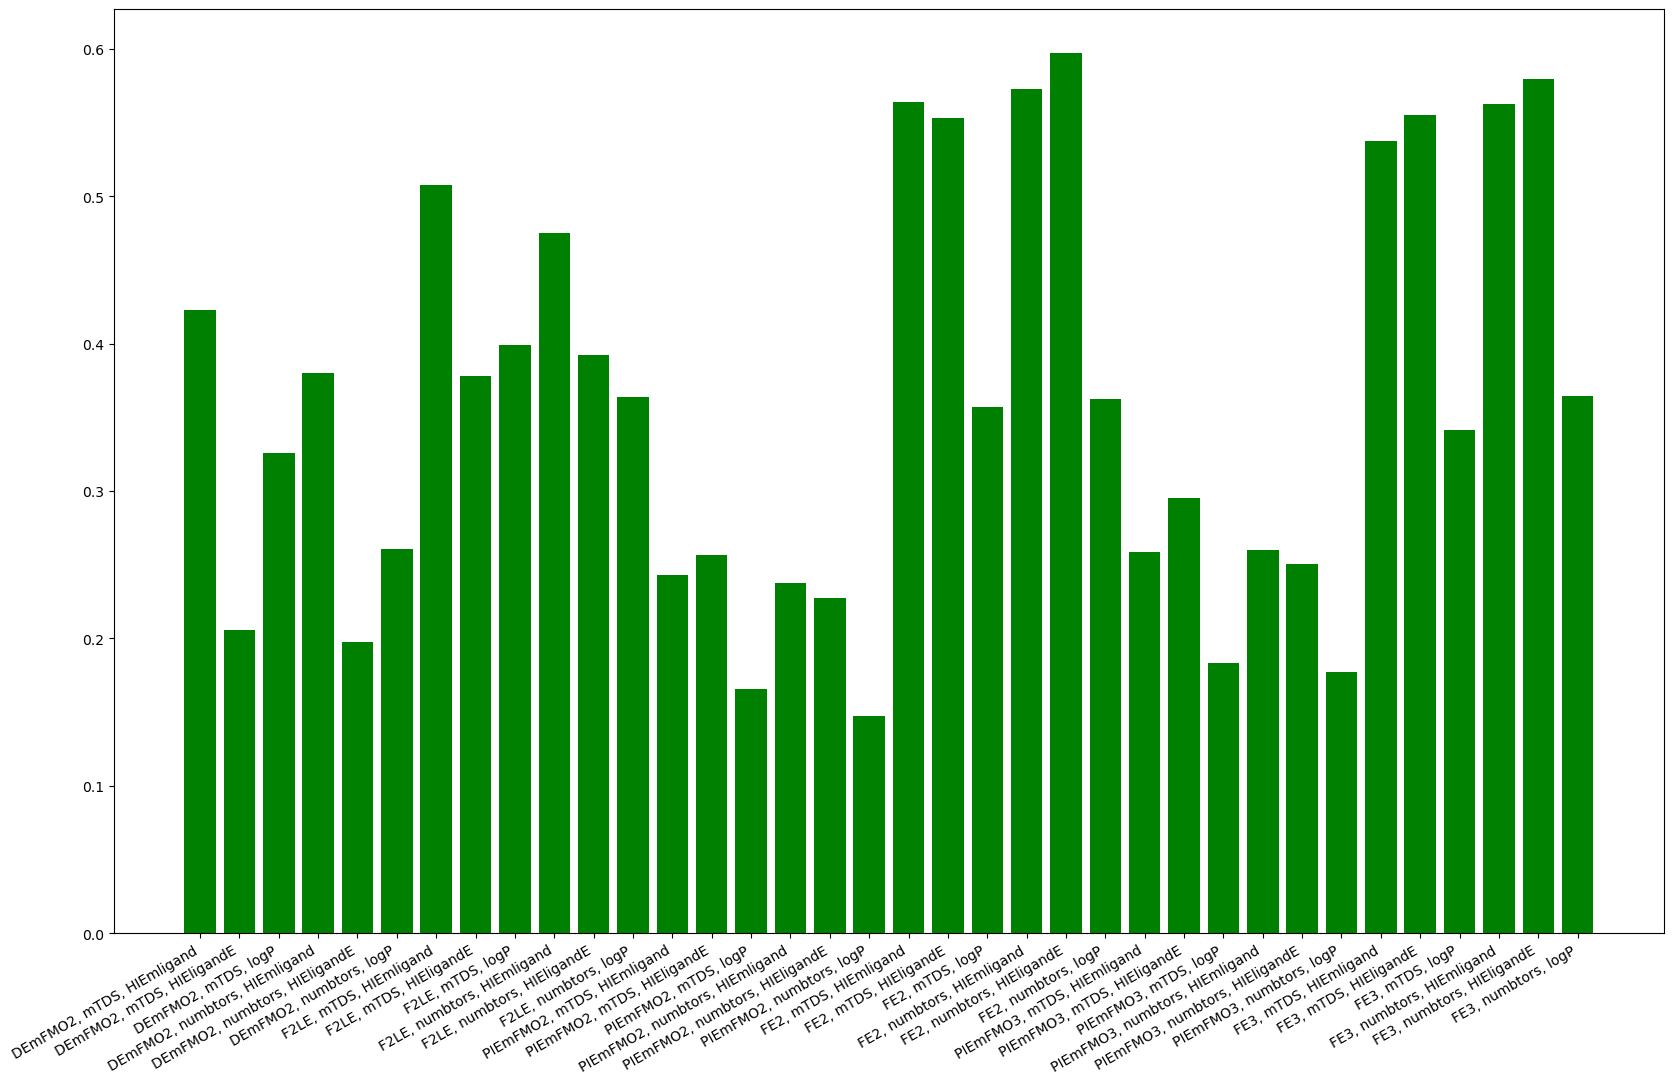

In [16]:
# 3 elements one for each set 

msedict = {}
r2dict = {}

label = 'Gexp'

set1 = ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', \
       'FE3']
set2 = ['mTDS', 'numbtors']
set3 = ['HIEmligand', 'HIEligandE', 'logP']

hr2 = 0.0
hinter = 0.0
hcoeff = 0.0
hfeatlist = None

for f1 in set1:
    for f2 in set2:
        for f3 in set3:
            featlist = [f1, f2, f3]
            y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
            xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
            msedict[xlabel] = mse
            r2dict[xlabel] = r2
            if (r2 > hr2):
                hr2 = r2
                hinter = regr.intercept_
                hcoeff = regr.coef_
                hfeatlist = featlist
                
            print("%60s %10.5f %10.5f"%(xlabel, mse, r2))

print(hfeatlist, hr2, hcoeff, hinter)

fig, ax = pyplot.subplots(figsize=(20,12))
ax.bar(r2dict.keys(), r2dict.values(), color='g')
pyplot.xticks(rotation=30, ha='right')

                                     DEmFMO2, F2LE, PIEmFMO2    0.03135    0.93343
                                          DEmFMO2, F2LE, FE2    0.11374    0.75848
                                     DEmFMO2, F2LE, PIEmFMO3    0.01641    0.96515
                                          DEmFMO2, F2LE, FE3    0.09320    0.80211
                                         DEmFMO2, F2LE, mTDS    0.19139    0.59361
                                     DEmFMO2, F2LE, numbtors    0.15305    0.67501
                                   DEmFMO2, F2LE, HIEmligand    0.17457    0.62933
                                   DEmFMO2, F2LE, HIEligandE    0.05723    0.87847
                                         DEmFMO2, F2LE, logP    0.21584    0.54169
                                     DEmFMO2, PIEmFMO2, F2LE    0.03135    0.93343
                                      DEmFMO2, PIEmFMO2, FE2    0.03673    0.92201
                                 DEmFMO2, PIEmFMO2, PIEmFMO3    0.03175    0.93259
    

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

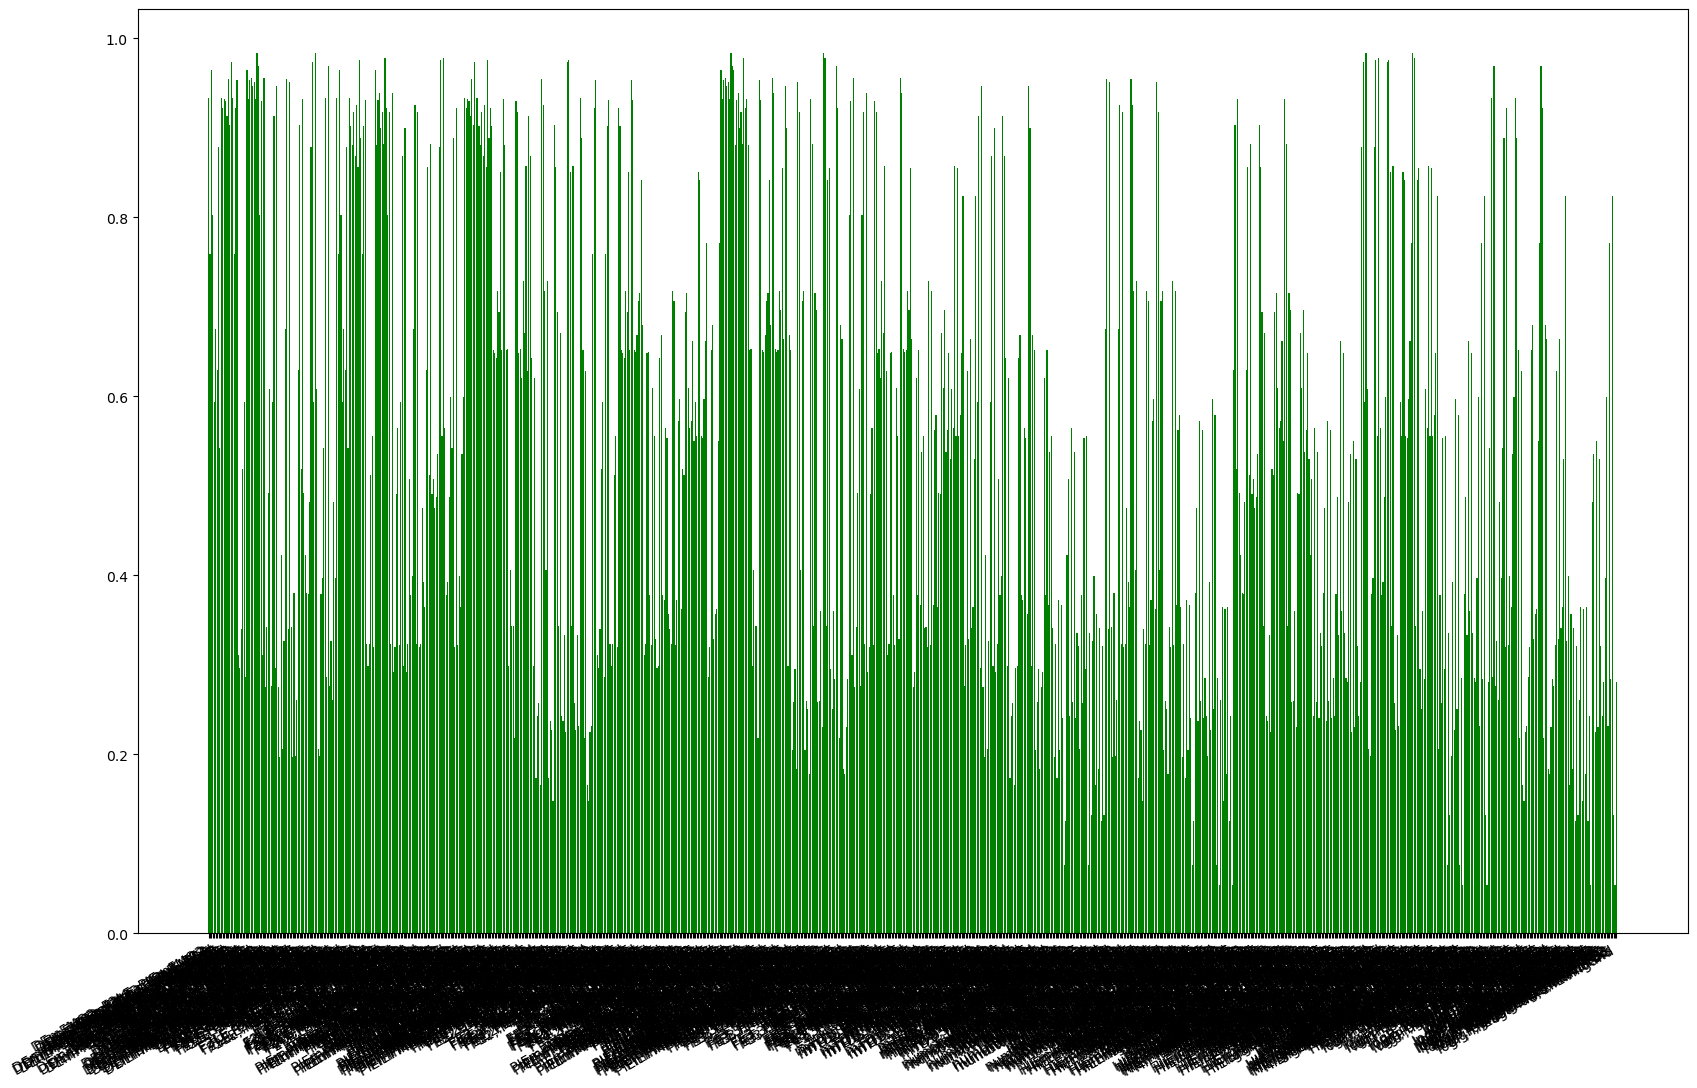

In [19]:
# 3 elements all possible combination

msedict = {}
r2dict = {}

label = 'Gexp'

set1 = ['DEmFMO2', 'F2LE', 'PIEmFMO2', 'FE2', 'PIEmFMO3', \
       'FE3', 'mTDS', 'numbtors', 'HIEmligand', 'HIEligandE', 'logP']


hr2 = 0.0
hinter = 0.0
hcoeff = 0.0
hfeatlist = None

for f1 in set1:
    for f2 in set1:
        if f1 != f2:
            for f3 in set1:
                if f3 != f1 and f3 != f2:
                    featlist = [f1, f2, f3]
                    y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df1)
                    xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
                    msedict[xlabel] = mse
                    r2dict[xlabel] = r2
                    if (r2 > hr2):
                        hr2 = r2
                        hinter = regr.intercept_
                        hcoeff = regr.coef_
                        hfeatlist = featlist
                        
                    print("%60s %10.5f %10.5f"%(xlabel, mse, r2))

print(hfeatlist, hr2, hcoeff, hinter)

fig, ax = pyplot.subplots(figsize=(20,12))
ax.bar(r2dict.keys(), r2dict.values(), color='g')
pyplot.xticks(rotation=30, ha='right')

In [17]:
# calculate the correlation matrix
corr = df2.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '12pt'})\
    .set_caption("Correlation")\
    .set_precision(2)\
    .set_table_styles(magnify())

/tmp/ipykernel_2176415/2626602751.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,Gexp,DG,LE,HIEmligand,logP
Gexp,1.00,0.68,0.60,0.41,0.21
DG,0.68,1.00,0.99,0.41,-0.28
LE,0.60,0.99,1.00,0.42,-0.37
HIEmligand,0.41,0.41,0.42,1.00,-0.03
logP,0.21,-0.28,-0.37,-0.03,1.00


Intercept: 
 -10.05714676180903
Coeff         DG     0.1033 
Coeff         LE    -2.1811 
Coeff HIEmligand     0.0306 
Coeff       logP     0.2473 
MSE:    0.11442 R2:    0.75704


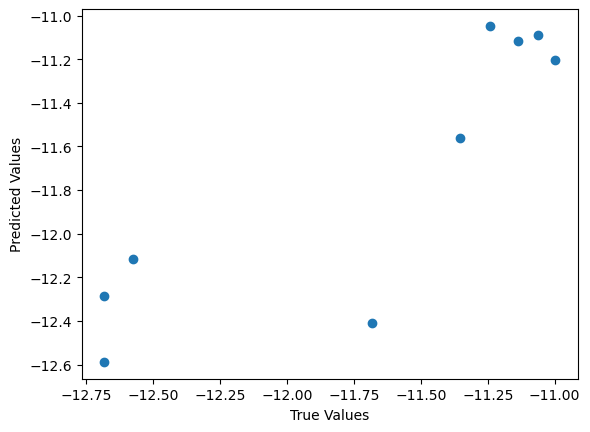

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

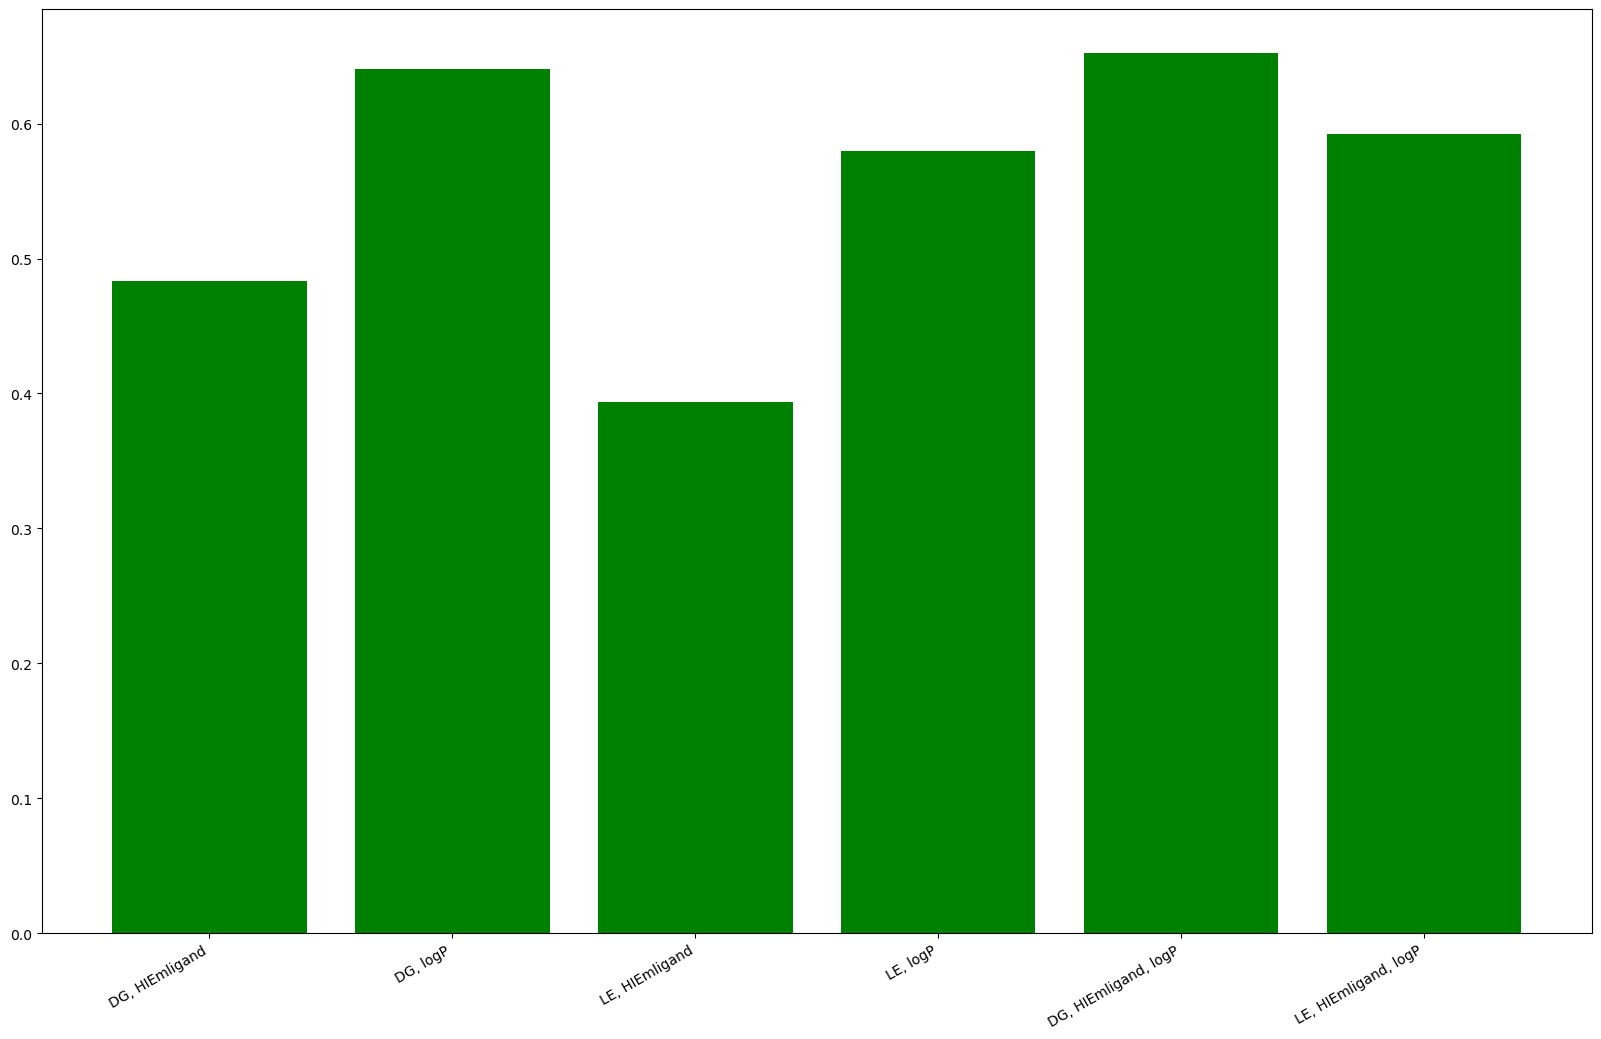

In [18]:
featlist = ['DG', 'LE', 'HIEmligand', 'logP']
label = 'Gexp'
y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df2)
print_and_plot(y, ypred, regr, mse, r2)

msedict = {}
r2dict = {}

set1 = ['DG', 'LE']
set2 = ['HIEmligand', 'logP']

for f1 in set1:
    for f2 in set2:
        featlist = [f1, f2]
        y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df2)
        xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
        msedict[xlabel] = mse
        r2dict[xlabel] = r2
        #print("%60s %10.5f %10.5f"%(xlabel, mse, r2))

fullfeatlis = [['DG', 'HIEmligand', 'logP'], \
               ['LE', 'HIEmligand', 'logP']]

for featlist in fullfeatlis:
    y, ypred, regr, mse, r2 = get_lr_model (featlist, label, df2)
    xlabel = str(featlist).replace("\'", "").replace("[", "").replace("]", "") 
    msedict[xlabel] = mse
    r2dict[xlabel] = r2

fig, ax = pyplot.subplots(figsize=(20,12))
ax.bar(r2dict.keys(), r2dict.values(), color='g')
pyplot.xticks(rotation=30, ha='right')